# Android Data from PlayStore

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [240]:
# Load data
df = pd.read_csv('googleplaystore.csv')
df_user_reviews = pd.read_csv('googleplaystore_user_reviews.csv')
df.head()
df_user_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [247]:
# check for null values
# rating has a few
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

## Preprocessing
Many columns need preformatting to be able to use them in any machine learning models. They should be converted to numbers.

In [242]:
# preformat #Installs
df = df[df['Installs'] != 'Free']
new_df = df['Installs'].map(lambda s : s[:-1].replace(',',''))
new_df[new_df == ''] = 0
new_df.astype(int).unique()
df['Installs'] = new_df.astype(int)

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [243]:
# preformat #Reviews
df['Reviews'] = df['Reviews'].astype(int)

In [245]:
# Other preformat cells here !!!!!!!

In [246]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Missing values

Rating column has 10% missing values. To not lose the data, we try and predict its values using the other features.

In [248]:
# Because not all features are preprocessed yet, we got only to use 'Reviews' and 'Installs'. 
# This led to terrible results, like an R squared error of 0.002
# But below you can find an example that find a linear model between 'Reviews' and 'Installs' that works well
# It predicts number of 'Reviews' based on 'Installs' with an R squared error of 0.92 

In [250]:
# get the rows with null ratings out, to predict them later
df['rating_complete'] = df['Rating']
to_predict_rating = df[df['rating_complete'].isnull()]
# dfn - df without nulls
dfn = df[~df['rating_complete'].isnull()]

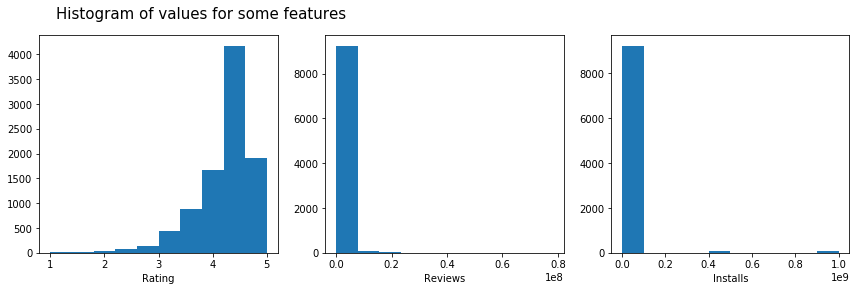

In [251]:
fig, axs = plt.subplots(nrows = 1, ncols = 3);
fig.suptitle('Histogram of values for some features', fontsize = 15);
axs[0].hist(dfp['rating_complete']);
axs[0].set_xlabel('Rating');
axs[1].hist(dfp['Reviews']);
axs[1].set_xlabel('Reviews');
axs[2].hist(dfp['Installs']);
axs[2].set_xlabel('Installs');
fig.subplots_adjust(right = 2);

In [327]:
# we use .values because the ML models work with numpy arrays, not pandas dataframes
Y = dfn['Reviews'].values
X = dfn[['Installs']].values

In [252]:
# In some cases we may need to scale data. There are many types of scallers in the preprocessing module. 
# Here is an example

# from sklearn import preprocessing
# scaler = preprocessing.MinMaxScaler()
# X = scaler.fit_transform(X)
# Y = scaler.fit_transform(Y.reshape(-1,1)).squeeze()

In [328]:
# when creating a ML model, we split data in train and test 
# we train the model on the train data and evaluate its performance on the test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [329]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
print('Train R squared : %.4f' % lr.score(x_train,y_train))
print('Test R squared : %.4f' % lr.score(x_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Train R squared : 0.3746
Test R squared : 0.5583


In [330]:
X_log = np.log(X)
Y_log = np.log(Y)
x_train, x_test, y_train, y_test = train_test_split(X_log, Y_log, test_size = 0.2, random_state = 42)

In [331]:
lr.fit(x_train, y_train)
print('Train R squared : %.4f' % lr.score(x_train,y_train))
print('Test R squared : %.4f' % lr.score(x_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Train R squared : 0.9196
Test R squared : 0.9140


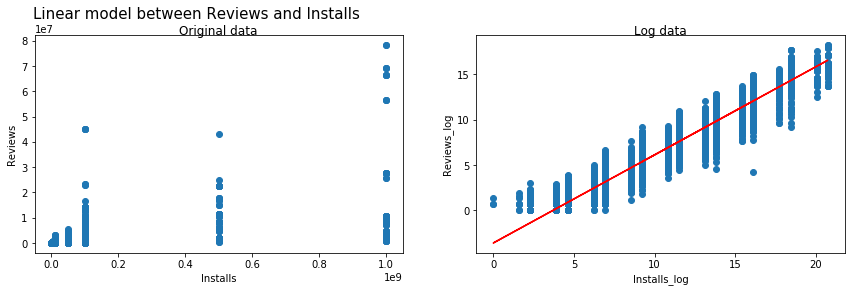

In [362]:
dfp.columns
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2);
fig.suptitle('Linear model between Reviews and Installs', fontsize = 15)
fig.subplots_adjust(right = 2)
ax1.set_title('Original data')
ax1.scatter(X, Y);
ax1.set_xlabel('Installs');
ax1.set_ylabel('Reviews');
ax2.set_title('Log data')
ax2.scatter(X_log[:,0], Y_log);
ax2.set_xlabel('Installs_log')
ax2.set_ylabel('Reviews_log');
y_pred = lr.predict(X_log)
ax2.plot(X_log[:,0], y_pred, c = 'red');